# Adversarials Iterative

In [ ]:
!git clone https://github.com/sarathknv/adversarial-examples-pytorch.git

Cloning into 'adversarial-examples-pytorch'...
remote: Enumerating objects: 602, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 602 (delta 14), reused 16 (delta 8), pack-reused 571
Receiving objects: 100% (602/602), 260.30 MiB | 38.05 MiB/s, done.
Resolving deltas: 100% (73/73), done.
Updating files: 100% (511/511), done.


In [ ]:
import os
os.chdir('/content/adversarial-examples-pytorch/iterative')
!pwd

/content/adversarial-examples-pytorch/iterative


In [ ]:
!python3 iterative.py --img images/goldfish.jpg --model resnet18

Iterative Method
Model: resnet18

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



# Basic Iterative Method (Targeted and Non-targeted)

Gender Classification Dataset: https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

Model face_gender_classification_transfer_learning_with_ResNet18.pth : https://drive.google.com/file/d/1lIGiUwC-SzDEaucmSJwt1JY0KZ4ufRiV/view?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
""" Basic Iterative Method (Targeted and Non-targeted)
    Paper link: https://arxiv.org/abs/1607.02533

"""
import torch
from torch.autograd import Variable
from torchvision import models
import torch.nn as nn
from torchvision import transforms

import numpy as np
import cv2
import argparse
from imagenet_labels import classes

from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

data_path = '/content/drive/MyDrive/data/'

image_path = data_path + 'male0.jpg'

model_name = 'resnet18'

#model_name ='/content/drive/MyDrive/models/face_gender_classification_transfer_learning_with_ResNet18.pth'

y_true = ''
target = None
gpu = ''

IMG_SIZE = 224

print('Iterative Method')
print('Model: %s' %(model_name))


Iterative Method
Model: resnet18


In [ ]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EVd9bFWzqztMrXRDdNnCHQkBsHaM4n5_1q1fue77vtQVtw?download=1 -O classification_model.pth

--2024-03-04 09:52:24--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EVd9bFWzqztMrXRDdNnCHQkBsHaM4n5_1q1fue77vtQVtw?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/face_gender_classification_transfer_learning_with_ResNet18.pth?ga=1 [following]
--2024-03-04 09:52:25--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/face_gender_classification_transfer_learning_with_ResNet18.pth?ga=1
Reusing existing connection to postechackr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 44791417 (43M) [application/octet-stream]
Saving to: ‘classification_model.pth’

classificati

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

save_path = '/content/drive/MyDrive/models/face_gender_classification_transfer_learning_with_ResNet18.pth'
class_name = ['female', 'male']

model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2) # binary classification (num_of_class == 2)
# With GPU:
#model.load_state_dict(torch.load(save_path))
# With CPU:
model.load_state_dict(torch.load(save_path, map_location=torch.device('cpu')))

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

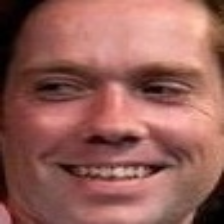

In [ ]:
# break loop when parameters are changed
break_loop = False

# Show the original image
original = cv2.imread(image_path)
original = cv2.resize(original, (IMG_SIZE, IMG_SIZE))
cv2_imshow(original)

# load image and reshape to (3, 224, 224) and RGB (not BGR)
# preprocess as described here: http://pytorch.org/docs/master/torchvision/models.html
orig = cv2.imread(image_path)[..., ::-1]
orig = cv2.resize(orig, (IMG_SIZE, IMG_SIZE))
img = orig.copy().astype(np.float32)
#perturbation = np.empty_like(orig)

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img /= 255.0
img = (img - mean)/std
img = img.transpose(2, 0, 1)


In [ ]:
criterion = nn.CrossEntropyLoss()


In [ ]:
# prediction before attack
model.eval()

inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0), requires_grad=True)
orig = torch.from_numpy(img).float().to(device).unsqueeze(0)

out = model(inp)
pred = np.argmax(out.data.cpu().numpy())

if target is not None:
    pred = target

print('Prediction before attack: %s' %(class_name[pred]))
original_pred = class_name[pred]

Prediction before attack: male


In [ ]:
inp = Variable(torch.from_numpy(img).to(device).float().unsqueeze(0), requires_grad=True)

eps = int(input ("Enter eps [1..255]:"))
alpha = 10
num_iter = int(input ("Enter num_iter [10..1000]:"))

print('eps [%d]' %(eps))
print('Iter [%d]' %(num_iter))
print('alpha [1]')
print('-'*20)

for i in range(num_iter):
  ##############################################################
  out = model(inp)
  loss = criterion(out, Variable(torch.Tensor([float(pred)]).to(device).long()))

  loss.backward()

  # this is the method
  perturbation = (alpha/255.0) * torch.sign(inp.grad.data)
  perturbation = torch.clamp((inp.data + perturbation) - orig, min=-eps/255.0, max=eps/255.0)
  inp.data = orig + perturbation

  inp.grad.data.zero_()
  ################################################################

  pred_adv = np.argmax(model(inp).data.cpu().numpy())

  print("Iter [%3d/%3d]:  Prediction with attack: %s Loss: %f"
          %(i, num_iter, class_name[pred_adv], loss.item()))
  adv_pred = class_name[pred_adv]


  # deprocess image
  adv = inp.data.cpu().numpy()[0]
  pert = (adv-img).transpose(1,2,0)
  adv = adv.transpose(1, 2, 0)
  adv = (adv * std) + mean
  adv = adv * 255.0
  adv = adv[..., ::-1] # RGB to BGR
  adv = np.clip(adv, 0, 255).astype(np.uint8)
  pert = pert * 255
  pert = np.clip(pert, 0, 255).astype(np.uint8)


#cv2.imshow(window_adv, pert)
#cv2.imshow('adversarial image', adv)

#cv2_imshow(pert)
#cv2_imshow(adv)

out = cv2.imwrite('img_adv.png', adv)
out = cv2.imwrite('perturbation.png', pert)

Enter eps [1..255]:10
Enter num_iter [10..1000]:10
eps [10]
Iter [10]
alpha [1]
--------------------
Iter [  0/ 10]:  Prediction with attack: female Loss: 0.002516
Iter [  1/ 10]:  Prediction with attack: female Loss: 6.125114
Iter [  2/ 10]:  Prediction with attack: female Loss: 14.189223
Iter [  3/ 10]:  Prediction with attack: female Loss: 18.665413
Iter [  4/ 10]:  Prediction with attack: female Loss: 23.135395
Iter [  5/ 10]:  Prediction with attack: female Loss: 21.801998
Iter [  6/ 10]:  Prediction with attack: female Loss: 25.620354
Iter [  7/ 10]:  Prediction with attack: female Loss: 23.974901
Iter [  8/ 10]:  Prediction with attack: female Loss: 24.644615
Iter [  9/ 10]:  Prediction with attack: female Loss: 26.327066


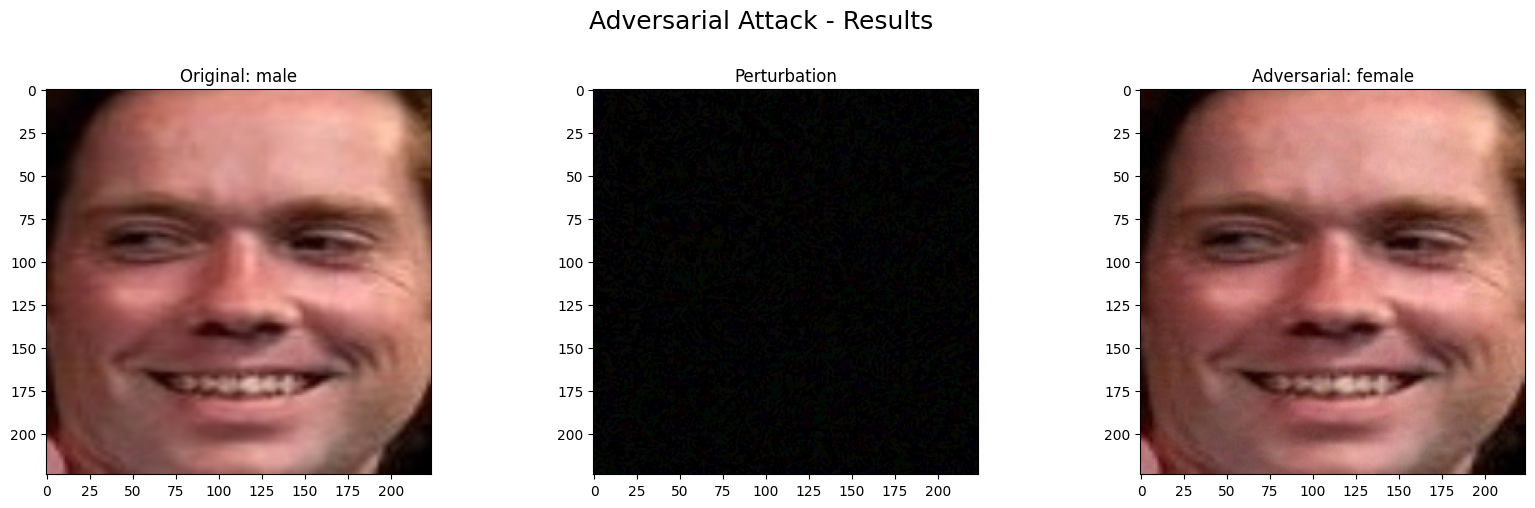

In [ ]:
fig, ax = plt.subplots(figsize = (20,5), ncols=3, nrows=1)

# Titulo de la figura
fig.suptitle('Adversarial Attack - Results', fontsize=18, y = 1.04)

# Titulo de cada eje
ax[0].set_title('Original: ' + original_pred)
ax[1].set_title('Perturbation')
ax[2].set_title('Adversarial: ' + adv_pred)

ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(pert, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(adv, cv2.COLOR_BGR2RGB))

fig.show()
